In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from scipy.stats import binom as binomial

In [80]:
p = np.random.random(10000)
df = pd.DataFrame()
df['p'] = p
df.head()

,p
0,0.782971
1,0.018836
2,0.390332
3,0.575575
4,0.316579


In [81]:
# prob of (5,3)
df['prob (A=5,B=3)'] = binomial.pmf(3,8,p)
df.head()

,p,"prob (A=5,B=3)"
0,0.782971,0.012942
1,0.018836,0.000340
2,0.390332,0.280516
3,0.575575,0.147061
4,0.316579,0.264896


In [82]:
# prob of (5,3)
yn = []
for v in df['prob (A=5,B=3)']:
    if v > np.random.random(1):
        yn.append(1)
    else:
        yn.append(0)

df['good game'] = yn
df.head()

,p,"prob (A=5,B=3)",good game
0,0.782971,0.012942,0
1,0.018836,0.000340,0
2,0.390332,0.280516,0
3,0.575575,0.147061,0
4,0.316579,0.264896,0


In [83]:
df = df[df['good game']==1]
len(df)

1136

In [84]:
wins = []
for v in df['p']:
    wins.append(v**3)

df['prob (Bob wins)'] = wins
df.head()

,p,"prob (A=5,B=3)",good game,prob (Bob wins)
10,0.372739,0.281607,1,0.051786
22,0.380674,0.281478,1,0.055164
34,0.664828,0.069607,1,0.293851
36,0.510992,0.208934,1,0.133427
37,0.150577,0.084545,1,0.003414


In [85]:
wn = []
for v in df['prob (Bob wins)']:
    if v > np.random.random(1):
        wn.append('Bob')
    else:
        wn.append('Alice')

df['Winner'] = wn
df.head()

,p,"prob (A=5,B=3)",good game,prob (Bob wins),Winner
10,0.372739,0.281607,1,0.051786,Alice
22,0.380674,0.281478,1,0.055164,Alice
34,0.664828,0.069607,1,0.293851,Alice
36,0.510992,0.208934,1,0.133427,Alice
37,0.150577,0.084545,1,0.003414,Alice


In [86]:
df['Winner'].value_counts()

Alice    1033
Bob       103
Name: Winner, dtype: int64

In [87]:
len(df[df['Winner'] == 'Bob']), len(df[df['Winner'] == 'Alice'])

(103, 1033)

In [88]:
len(df[df['Winner'] == 'Bob']) / len(df)

0.09066901408450705

In [185]:
p_bob = []
n_samples = 10000
n_experiments = 1000
for _ in range(n_experiments):
    # generate random sampling of prob for Bob wining the game
    p = np.random.random(n_samples)
    # find probability of the state Alice=5, Bob=3
    prob_5_3 = binomial.pmf(3,8,p)
    
    # find good games (when the game instance occurs)
    rdn_nrs  = np.random.random(n_samples)
    good_games = np.array(prob_5_3 > rdn_nrs)
    n_good_games = np.sum(good_games)
    
    # find probability that Bob wins the game
    p_bob_wins_game = p[good_games]**3
    
    # find whether Bob wins the game
    rdn_nrs2 = np.random.random(n_good_games)
    bob_wins_game = np.array(p_bob_wins_game > rdn_nrs2)
    n_bob_wins_game = np.sum(bob_wins_game)
    
    # save probability of Bob winning 
    p_bob.append(n_bob_wins_game/n_good_games)

In [186]:
p_bob_freq, p_bob_bayes = (3/8)**3, 1/11
print(f'Frequentist prob Bob wins: {p_bob_freq:.2f}')
print(f'Bayesian prob Bob wins   : {p_bob_bayes:.2f}')

Frequentist prob Bob wins: 0.05
Bayesian prob Bob wins   : 0.09


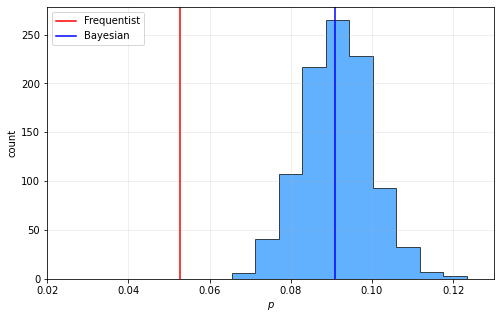

In [187]:
fig, ax = plt.subplots(figsize=(8, 5))

xmin, xmax = 0.02, 0.13
ax.hist(p_bob, color='dodgerblue', alpha=.7, histtype='stepfilled', ec='k')
ymin, ymax = ax.axis()[-2:]
ax.plot([p_bob_freq, p_bob_freq], [0, ymax], 'r-', label='Frequentist')
ax.plot([p_bob_bayes, p_bob_bayes],[0,ymax], 'b-', label='Bayesian')
ax.set(xlabel='$p$', ylabel='count', xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)
ax.legend();